<a href="https://colab.research.google.com/github/viktoriya-bel/Tensorflow-labs/blob/main/BBC_News_%D0%9B%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate \
    https://huggingface.co/datasets/SetFit/bbc-news/raw/main/bbc-text.csv \
    -O /tmp/bbc-text.csv

  
import csv
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from keras.metrics import categorical_accuracy




#Stopwords list from https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", 
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", 
             "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", 
             "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", 
             "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", 
             "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", 
             "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", 
             "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", 
             "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", 
             "yourselves" ];

vocab_size = 10000
embedding_dim = 16
max_length = 120


--2023-06-03 12:43:30--  https://huggingface.co/datasets/SetFit/bbc-news/raw/main/bbc-text.csv
Resolving huggingface.co (huggingface.co)... 108.138.64.67, 108.138.64.89, 108.138.64.127, ...
Connecting to huggingface.co (huggingface.co)|108.138.64.67|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/plain]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2023-06-03 12:43:31 (255 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [ ]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)

    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            exclude = " " + word + " "
            sentence = sentence.replace(exclude, " ")
            sentence = sentence.replace("  ", " ")
        sentences.append(sentence)
        
print(len(sentences))
print(sentences[0])

#Expected output
# 2225
# tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want.

2225
tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable sa

In [ ]:
split_size = .8
train_size = int(len(sentences) * split_size) 

train_sentences = sentences[:train_size]
train_labels = labels[:train_size] 

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_sentences)
print(train_labels)

['tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satel

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token="")
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

print(len(word_index))

27285


In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

print(train_padded[0])
print(train_padded.shape)

[  99  170 1157 1121   55  993  771 6583   97 1319 4308  139  186 3669
 1230 1211 1589   48    9  907   99    4 6113  347   93   24   17  140
 3276 1231 2436  585  465 1392   65 3393 3537 1674   10  935    4  745
   12  858    1   11  613 1590 1122  408    4 1954 1121  746   55  552
 1414 2027 1635  144  262  123 2370  809 4997  994  599   12 3972 3973
  935 2578  139  357  186 3669 7838 5333   45   69 2882   34   11    2
 4740   22    2 1320  146  429    9  153 1439   79 4520  449 4998   99
 1122   85 6114   90 2028   60 7839   99    8 1022  614   97 1319   99
 1977  141  147  433   11 2883   44   56]
(1780, 120)


In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')

print(validation_padded[0])
print(validation_padded.shape)

[   1 1226  112   24  226  276 2980  132 1051 1458    3    4  112   24
 3049   61   28  493    1  674  903    3 1836 1800 2327   26    5 5363
 2002   66    2    1  219 1794 3705 1589  498    1  136    4  364 1153
    3   10    1  317    1    1    2  528 2415   18  328   28 1738 1458
  326 5756 4748  891 2046 1130 2417    3  301  353 9137 1738  508 3184
 1798 3953  569 2740    7  109  642  558 1836  276 2980 4454 3483 6987
   37 1532   76 2135  289   28 1174  505 2844   28   51   10  222 1622
 6616 2011 1624    1  628  268 1374   16   80 1331 3096 6589    1 4779
  499  311   26 1528  628    1   72    1]
(445, 120)


In [ ]:
tokenizer_label = Tokenizer()
tokenizer_label.fit_on_texts(labels)
train_label_sequences = np.array(tokenizer_label.texts_to_sequences(train_labels))
train_label_word_index = tokenizer_label.word_index

print(train_label_sequences)
print(train_label_word_index)
# Expected Output
# [[4], [2], [1], ..]
# {'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

[[4]
 [2]
 [1]
 ...
 [1]
 [2]
 [5]]
{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}


In [ ]:
validation_label_sequences = np.array(tokenizer_label.texts_to_sequences(validation_labels))
validation_label_word_index = tokenizer_label.word_index

print(validation_label_sequences)
print(validation_label_word_index)

[[5]
 [4]
 [3]
 [1]
 [1]
 [4]
 [2]
 [4]
 [5]
 [5]
 [3]
 [3]
 [2]
 [5]
 [1]
 [5]
 [5]
 [2]
 [1]
 [3]
 [4]
 [2]
 [1]
 [5]
 [4]
 [3]
 [3]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [5]
 [2]
 [3]
 [3]
 [4]
 [4]
 [5]
 [3]
 [5]
 [2]
 [3]
 [1]
 [1]
 [2]
 [4]
 [2]
 [4]
 [1]
 [2]
 [2]
 [3]
 [1]
 [1]
 [3]
 [3]
 [5]
 [5]
 [3]
 [2]
 [3]
 [3]
 [2]
 [4]
 [3]
 [3]
 [3]
 [3]
 [3]
 [5]
 [5]
 [4]
 [3]
 [1]
 [3]
 [1]
 [4]
 [1]
 [1]
 [1]
 [5]
 [4]
 [5]
 [4]
 [1]
 [4]
 [1]
 [1]
 [5]
 [5]
 [2]
 [5]
 [5]
 [3]
 [2]
 [1]
 [4]
 [4]
 [3]
 [2]
 [1]
 [2]
 [5]
 [1]
 [3]
 [5]
 [1]
 [1]
 [2]
 [3]
 [4]
 [4]
 [2]
 [2]
 [1]
 [3]
 [5]
 [1]
 [1]
 [3]
 [5]
 [4]
 [1]
 [5]
 [2]
 [3]
 [1]
 [3]
 [4]
 [5]
 [1]
 [3]
 [2]
 [5]
 [3]
 [5]
 [3]
 [1]
 [3]
 [2]
 [2]
 [3]
 [2]
 [4]
 [1]
 [2]
 [5]
 [2]
 [1]
 [1]
 [5]
 [4]
 [3]
 [4]
 [3]
 [3]
 [1]
 [1]
 [1]
 [2]
 [4]
 [5]
 [2]
 [1]
 [2]
 [1]
 [2]
 [4]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [2]
 [2]
 [5]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]
 [4]
 [2]
 [1]
 [1]
 [1]
 [2]
 [5]
 [4]
 [4]
 [4]
 [3]
 [2]
 [2]


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # tf.keras.layers.LSTM(64),
    # tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_9 (Bidirectio  (None, 120, 128)         41472     
 nal)                                                            
                                                                 
 bidirectional_10 (Bidirecti  (None, 64)               41216     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 244,801
Trainable params: 244,801
Non-tr

In [ ]:
history = model.fit(train_padded, train_label_sequences, epochs=30, validation_data=(validation_padded, validation_label_sequences), batch_size=32)

Epoch 1/30
56/56 [==============================] - 15s 174ms/step - loss: -31.5078 - acc: 0.2298 - val_loss: -56.9282 - val_acc: 0.2270
Epoch 2/30
56/56 [==============================] - 9s 153ms/step - loss: -84.3211 - acc: 0.2303 - val_loss: -110.9533 - val_acc: 0.2270
Epoch 3/30
56/56 [==============================] - 8s 136ms/step - loss: -147.2958 - acc: 0.2303 - val_loss: -178.9787 - val_acc: 0.2270
Epoch 4/30
56/56 [==============================] - 9s 153ms/step - loss: -223.7780 - acc: 0.2303 - val_loss: -260.5998 - val_acc: 0.2270
Epoch 5/30
56/56 [==============================] - 9s 152ms/step - loss: -314.6077 - acc: 0.2303 - val_loss: -356.3449 - val_acc: 0.2270
Epoch 6/30
56/56 [==============================] - 8s 151ms/step - loss: -420.2395 - acc: 0.2303 - val_loss: -466.5569 - val_acc: 0.2270
Epoch 7/30
56/56 [==============================] - 9s 152ms/step - loss: -539.2007 - acc: 0.2303 - val_loss: -588.6974 - val_acc: 0.2270
Epoch 8/30
56/56 [==================

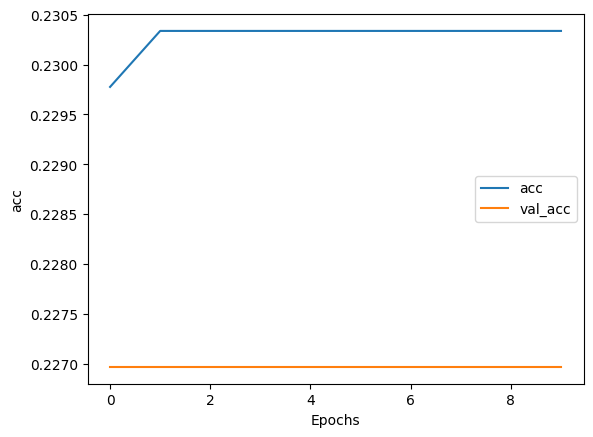

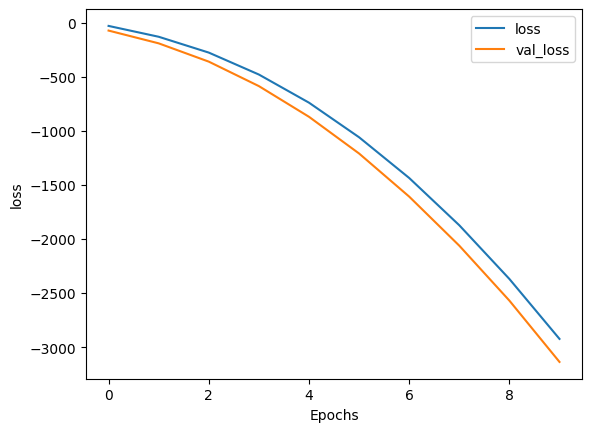

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'acc')
plot_graphs(history, 'loss')